# Log Analysis

In [1]:
from visualize import get_dataframe_log, plot_log

log_file = '192.168.10.1_42477\communication.log'
df_log = get_dataframe_log(log_file)

In [2]:
df_log

,time,action,pdu_type,frame_no,ack_no,data_size,status
0,2024-04-20 12:41:17,Send,MESSAGE,1,1,5,New
1,2024-04-20 12:41:17,Recv,ACK,1,2,0,OK
2,2024-04-20 12:41:22,Send,MESSAGE,2,2,4,New
3,2024-04-20 12:41:22,Recv,ACK,2,3,0,OK
4,2024-04-20 12:41:23,Send,MESSAGE,3,3,4,New
...,...,...,...,...,...,...,...
92716,2024-04-20 12:50:17,Send,ACK,98,99,0,New
92717,2024-04-20 12:50:17,Recv,FILE,99,99,1024,OK
92718,2024-04-20 12:50:17,Send,ACK,99,100,0,New
92719,2024-04-20 12:50:17,Recv,FILE,100,100,961,OK


<!-- 统计数据

- 文件划分的 PDU 总数量
- 通信总次数
- 超时次数
- 重传 PDU 的数量
- 总耗时 -->

- Statistics
    - Total number of PDUs
    - Total number of communications
    - Number of timeouts
    - Number of retransmitted PDUs
    - Total time

In [3]:
# Total number of PDUs
send_file_new_packets = df_log[
    (df_log["action"] == "Send") & (df_log["pdu_type"] == "FILE") & (df_log["status"] == "New")
]
print(f"Total number of PDUs: {len(send_file_new_packets)}")

Total number of PDUs: 769


In [4]:
# Total number of communications
success_packets = df_log[
    (df_log["status"] != "DataErr") & (df_log["status"] != "Retransmit") & (df_log["status"] != "Timeout")
]
print(f"Total number of communications: {len(success_packets) / 2 :.0f}")

Total number of communications: 41131


In [5]:
# Number of timeouts
timeouts = df_log[
    (df_log["status"] == "TimeOut")
]
print(f"Number of timeouts: {len(timeouts)}")

Number of timeouts: 8058


In [6]:
# Number of retransmissions
retransmissions = df_log[
    (df_log["status"] == "Retransmit")
]
print(f"Number of retransmissions: {len(retransmissions)}")

Number of retransmissions: 1940


In [7]:
# Number of data errors
data_errors = df_log[
    (df_log["status"] == "DataErr")
]
print(f"Number of data errors: {len(data_errors)}")

Number of data errors: 8519


In [8]:
# Total time
total_time = df_log["time"].max() - df_log["time"].min()
print(f"Total time: {total_time}")

Total time: 0 days 00:09:00


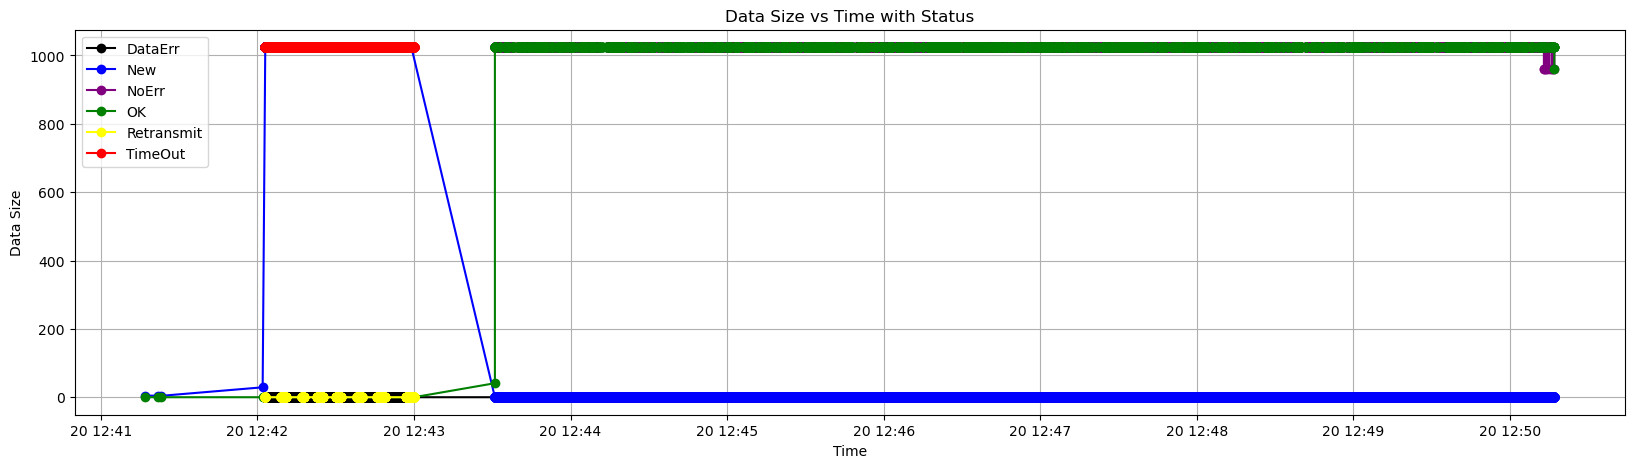

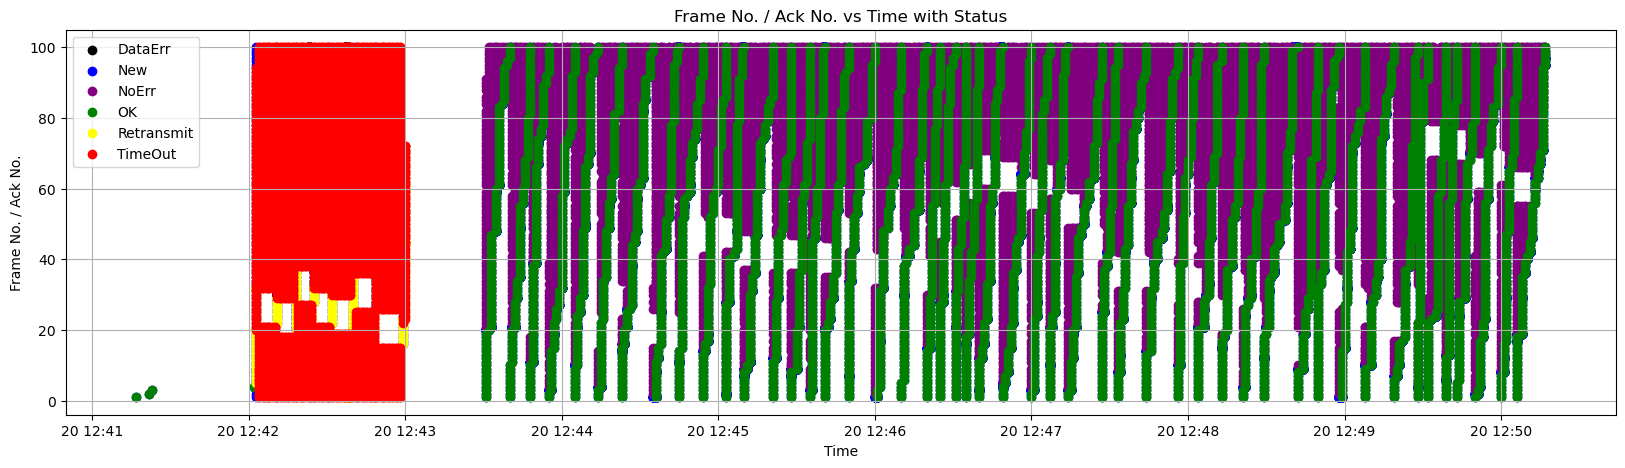

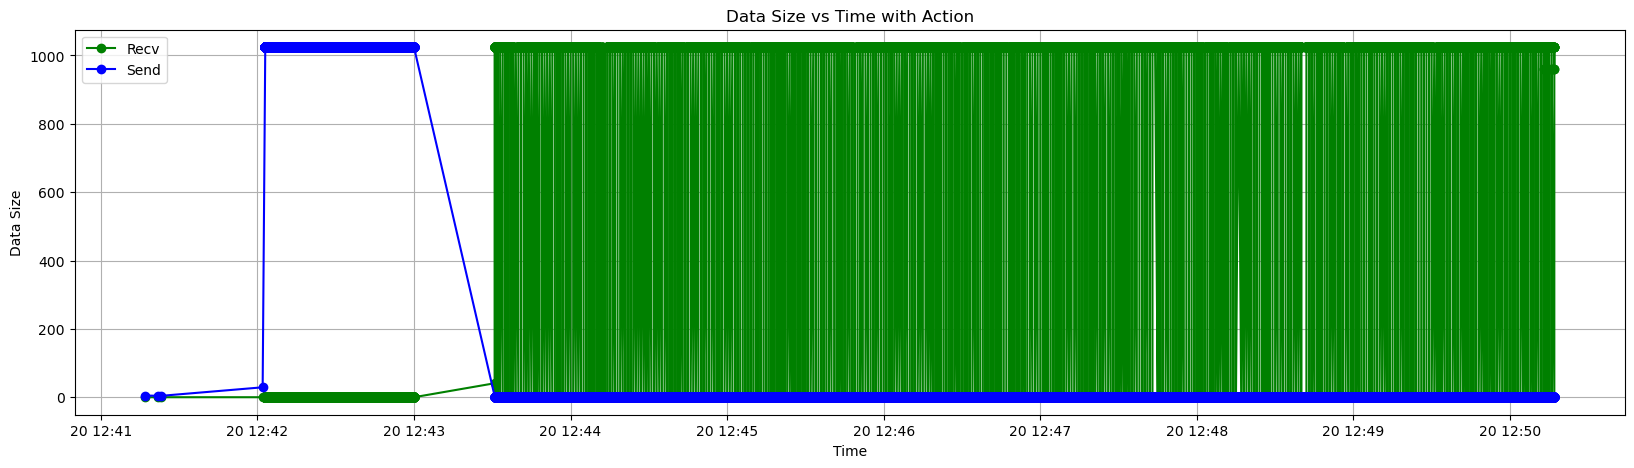

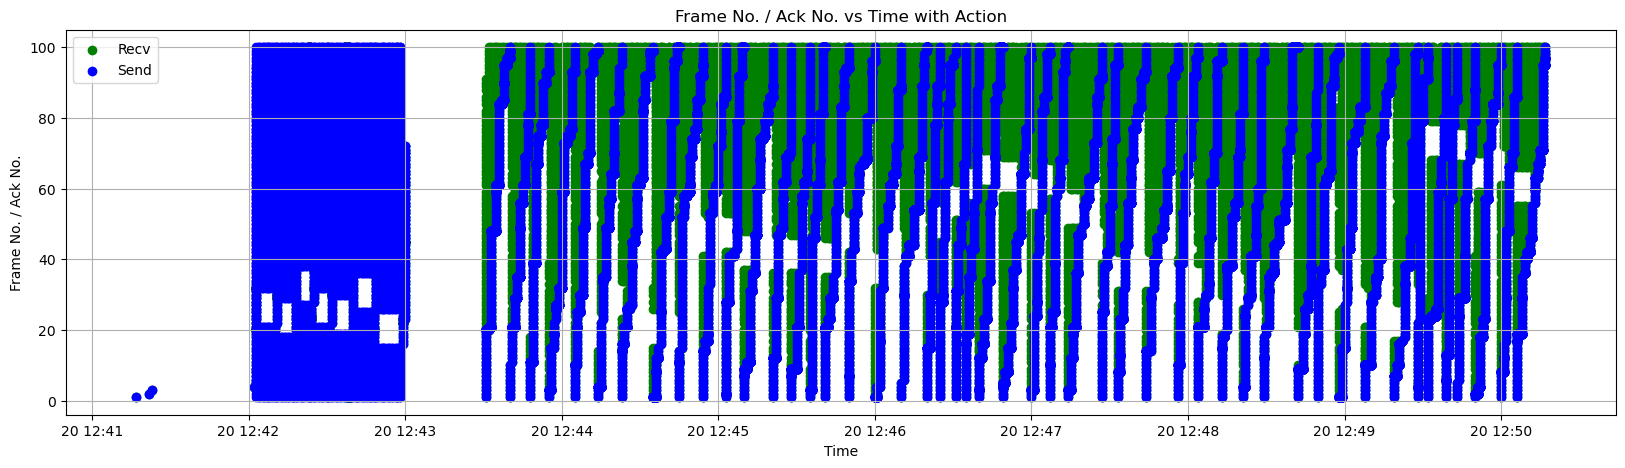

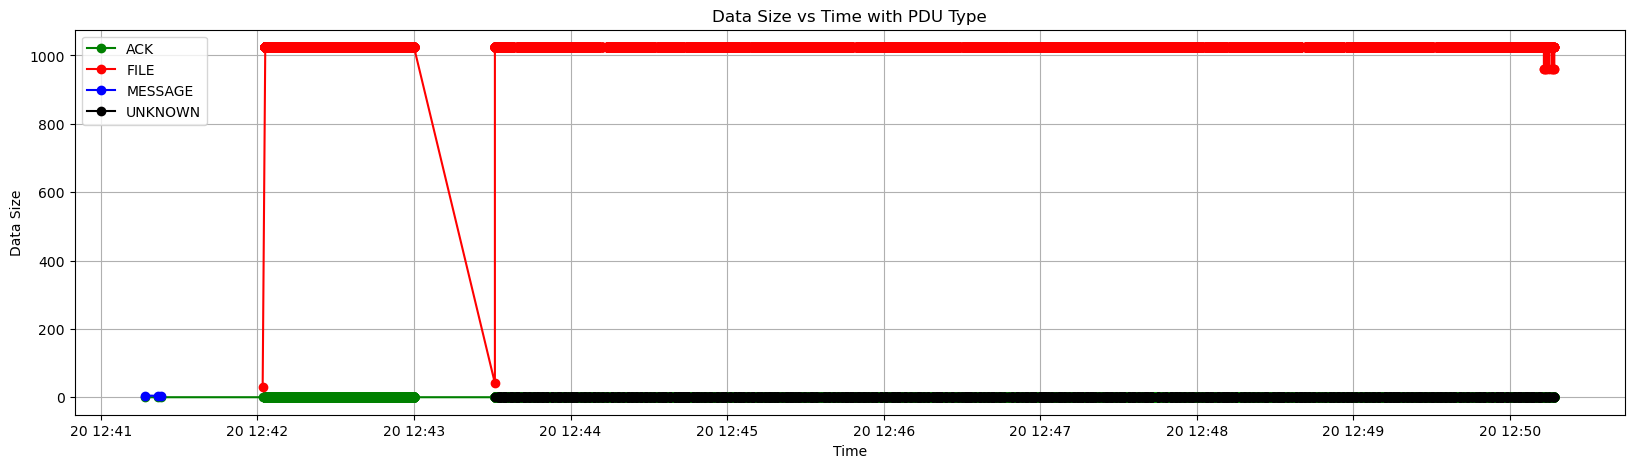

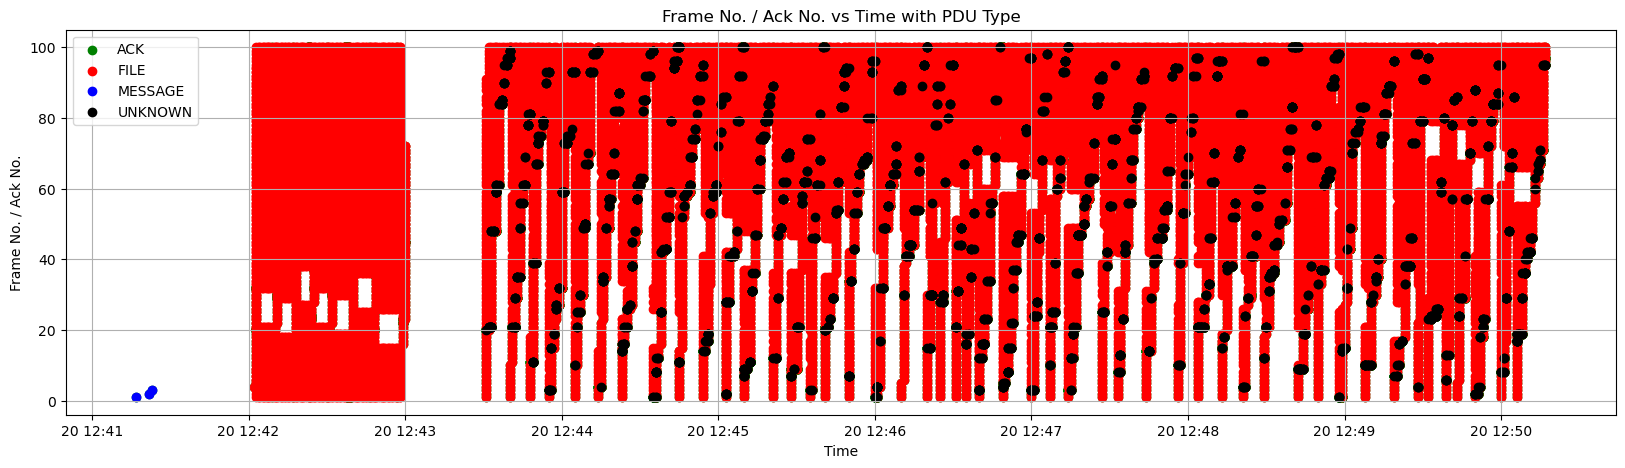

In [9]:
width, height = 20, 5
attributes = ['status', 'action', 'pdu_type']
show_values = ['data_size', 'frame_no']
for attribute in attributes:
    for show_value in show_values:
        plot_log(df_log, attribute, show_value, is_save=False, width=width, height=height)